In [1]:
print("all ok")

all ok


In [3]:
from dotenv import load_dotenv
load_dotenv()
import os
os.environ['GROQ_API_KEY'] = os.getenv("GROQ_API_KEY")

In [4]:
model="deepseek-r1-distill-llama-70b"

In [5]:
from langchain_groq import ChatGroq


In [7]:
llm=ChatGroq(model_name=model)

In [9]:
llm.invoke("hi")

AIMessage(content='<think>\n\n</think>\n\nHello! How can I assist you today? 😊', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 16, 'prompt_tokens': 4, 'total_tokens': 20, 'completion_time': 0.087357086, 'prompt_time': 5.5279e-05, 'queue_time': 0.054406841000000004, 'total_time': 0.087412365}, 'model_name': 'deepseek-r1-distill-llama-70b', 'system_fingerprint': 'fp_1bbe7845ec', 'finish_reason': 'stop', 'logprobs': None}, id='run--2e7407f0-2868-4c12-a12b-47e7e15895d0-0', usage_metadata={'input_tokens': 4, 'output_tokens': 16, 'total_tokens': 20})

In [11]:
print(llm.invoke("hi").content)

<think>

</think>

Hello! How can I assist you today? 😊


In [17]:
import operator
from typing import List
from langgraph.graph.message import add_messages
from langchain_core.tools import tool
from pydantic import BaseModel , Field
from typing import TypedDict, Annotated, Sequence
from langchain_core.messages import BaseMessage
from langchain_core.output_parsers import StrOutputParser
from langchain_core.prompts import ChatPromptTemplate, PromptTemplate
from langchain_core.messages import HumanMessage, AIMessage
from langgraph.graph import StateGraph,MessagesState,START,END

In [85]:
def call_model(state: MessagesState):
    messages = state['messages']
    response = llm.invoke(messages)
    return {"messages": [response]}

In [77]:
HumanMessage("hi how are you?")

HumanMessage(content='hi how are you?', additional_kwargs={}, response_metadata={})

In [78]:
HumanMessage(["hi how are you?"])

HumanMessage(content=['hi how are you?'], additional_kwargs={}, response_metadata={})

### this code is only for the testing

In [84]:

state={"messages":["hi hello how are you?"]}
call_model(state)

this is my current message: content='hi hello how are you?' additional_kwargs={} response_metadata={}


In [ ]:
# from langchain_core.messages import AnyMessage
# # class MessagesState(TypedDict):
# #     messages: Annotated[list[AnyMessage], add_messages]

In [86]:
workflow=StateGraph(MessagesState)

In [87]:
workflow.add_node("mybot",call_model)

In [88]:
workflow.add_edge(START,"mybot")

In [89]:
workflow.add_edge("mybot",END)

In [90]:
app=workflow.compile()

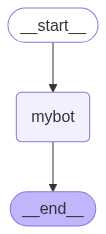

In [91]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [92]:
input={"messages":["hi hello how are you?"]}

In [93]:
app.invoke(input)

{'messages': [HumanMessage(content='hi hello how are you?', additional_kwargs={}, response_metadata={}, id='877b56b0-acc1-4f71-81af-0835818bf1f9'),
  AIMessage(content="<think>\n\n</think>\n\nHello! I'm just a virtual assistant, so I don't have feelings, but I'm here and ready to help you with whatever you need. How are you doing? 😊", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 42, 'prompt_tokens': 9, 'total_tokens': 51, 'completion_time': 0.184463599, 'prompt_time': 0.000213596, 'queue_time': 0.053161349, 'total_time': 0.184677195}, 'model_name': 'deepseek-r1-distill-llama-70b', 'system_fingerprint': 'fp_1bbe7845ec', 'finish_reason': 'stop', 'logprobs': None}, id='run--138951e1-e20a-4640-af6f-b56404438f14-0', usage_metadata={'input_tokens': 9, 'output_tokens': 42, 'total_tokens': 51})]}

In [94]:
for output in app.stream(input):
    for key,value in output.items():
        print(f"Output from {key} Node")
        print("_______")
        print(value)
        print("\n")

Output from mybot Node
_______
{'messages': [AIMessage(content="<think>\n\n</think>\n\nHello! I'm just a virtual assistant, so I don't have feelings, but I'm here and ready to help you with whatever you need. How are you doing? 😊", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 42, 'prompt_tokens': 9, 'total_tokens': 51, 'completion_time': 0.187418124, 'prompt_time': 0.000211927, 'queue_time': 0.053487063, 'total_time': 0.187630051}, 'model_name': 'deepseek-r1-distill-llama-70b', 'system_fingerprint': 'fp_1bbe7845ec', 'finish_reason': 'stop', 'logprobs': None}, id='run--eb76b092-eeb7-4986-9683-5349fa708176-0', usage_metadata={'input_tokens': 9, 'output_tokens': 42, 'total_tokens': 51})]}


